# Alzheimer's Disease - EDA and Data Cleasning


According to [CDC](https://www.cdc.gov/aging/aginginfo/alzheimers.htm) Alzheimer’s disease (AD) is the most common type of dementia. It is a progressive disease beginning with mild memory loss and possibly leading to loss of the ability to carry on a conversation and respond to the environment.

AD is one of the top 10 leading causes of death in the United States. The cost of treatment is high and death rates are increasing, unlike heart disease and cancer death rates that are on the decline. [More info](https://www.cdc.gov/nchs/data/databriefs/db116.pdf)

This project goal is to create and compare model for AD prediction. EDA and Data Cleansing process will be model-oriented.


## Data Descriptions

This project using [OASIS-2: Longitudinal MRI Data in Nondemented and Demented Older Adults](https://www.oasis-brains.org/#data).

- The dataset consists of a longitudinal collection of 150 subjects aged 60 to 96.

- Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included.

- The subjects are all right-handed and include both men and women.

- 72 of the subjects were characterized as nondemented throughout the study

- 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease.

- Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

<b> Understand Data Fields: </b>


|COL  |Descriptions and Frorms             |
|-----|------------------------------------|
|EDUC |Years of education                  |
|SES  |Socioeconomic Status                |
|MMSE |[Mini Mental State Examination](https://www.psychdb.com/cognitive-testing/mmse)       |
|CDR  |[Clinical Dementia Rating](https://knightadrc.wustl.edu/professionals-clinicians/cdr-dementia-staging-instrument/cdr-scoring-table)            |
|eTIV |[Estimated Total Intracranial Volume](https://link.springer.com/article/10.1007/s12021-015-9266-5) |
|nWBV |[Normalize Whole Brain Volume](https://www.ncbi.nlm.nih.gov/pubmed/11547042)        |
|ASF  |[Atlas Scaling Factor](http://www.sciencedirect.com/science/article/pii/S1053811904003271)                |

## EDA using Pandas, Seaborn and ydata_profiling

In [11]:
#pip install openpyxl
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Qt5Agg')

from ydata_profiling import ProfileReport

In [12]:
# bring in data
long = pd.read_excel('./Data/oasis_longitudinal_demographics.xlsx')
print(long.shape)
long.head()

(373, 15)


Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR         eTIV      nWBV       ASF  
0  2.0  27.0  0.0  1986.550000  0.696106  0.883440  
1  2.0  30.0  0.0  2004.479526  0.681062  0.875539  
2  NaN  23.0  0.5  1678.290000  0.736336  1.045710  
3  NaN  28.0  0.5  1737.620000  0.713402  1.010000  
4  NaN  22.0  0.5  1697.911134  0.701236  1.033623

In [13]:
long.describe().T

count         mean         std          min          25%  \
Visit     373.0     1.882038    0.922843     1.000000     1.000000   
MR Delay  373.0   595.104558  635.485118     0.000000     0.000000   
Age       373.0    77.013405    7.640957    60.000000    71.000000   
EDUC      373.0    14.597855    2.876339     6.000000    12.000000   
SES       354.0     2.460452    1.134005     1.000000     2.000000   
MMSE      371.0    27.342318    3.683244     4.000000    27.000000   
CDR       373.0     0.290885    0.374557     0.000000     0.000000   
eTIV      373.0  1488.121584  176.135956  1105.652499  1357.330000   
nWBV      373.0     0.729556    0.037141     0.644399     0.700191   
ASF       373.0     1.195460    0.138105     0.875539     1.098979   

                  50%          75%          max  
Visit        2.000000     2.000000     5.000000  
MR Delay   552.000000   873.000000  2639.000000  
Age         77.000000    82.000000    98.000000  
EDUC        15.000000    16.000000    23.000000  
SES          2.000000     3.000000     5.000000  
MMSE        29.000000    30.000000    30.000000  
CDR          0.000000     0.500000     2.000000  
eTIV      1470.041312  1596.936793  2004.479526  
nWBV         0.728789     0.755669     0.836842  
ASF          1.193844     1.292980     1.587298

In [14]:
# Find NaN values
long.isna().sum()[long.isna().sum()>0]

SES     19
MMSE     2
dtype: int64

In [81]:
long[long['MMSE'].isna()]

Subject ID         MRI ID     Group  Visit  MR Delay M/F Hand  Age  EDUC  \
357  OAS2_0181  OAS2_0181_MR2  Demented      2       539   F    R   75    12   
358  OAS2_0181  OAS2_0181_MR3  Demented      3      1107   F    R   77    12   

     SES  MMSE  CDR         eTIV      nWBV       ASF  
357  NaN   NaN  1.0  1168.930000  0.741645  1.501370  
358  NaN   NaN  1.0  1158.567258  0.732767  1.514802

In [82]:
long[long['SES'].isna()]

Subject ID         MRI ID     Group  Visit  MR Delay M/F Hand  Age  EDUC  \
2    OAS2_0002  OAS2_0002_MR1  Demented      1         0   M    R   75    12   
3    OAS2_0002  OAS2_0002_MR2  Demented      2       560   M    R   76    12   
4    OAS2_0002  OAS2_0002_MR3  Demented      3      1895   M    R   80    12   
10   OAS2_0007  OAS2_0007_MR1  Demented      1         0   M    R   71    16   
11   OAS2_0007  OAS2_0007_MR3  Demented      3       518   M    R   73    16   
12   OAS2_0007  OAS2_0007_MR4  Demented      4      1281   M    R   75    16   
134  OAS2_0063  OAS2_0063_MR1  Demented      1         0   F    R   80    12   
135  OAS2_0063  OAS2_0063_MR2  Demented      2       490   F    R   81    12   
207  OAS2_0099  OAS2_0099_MR1  Demented      1         0   F    R   80    12   
208  OAS2_0099  OAS2_0099_MR2  Demented      2       807   F    R   83    12   
237  OAS2_0114  OAS2_0114_MR1  Demented      1         0   F    R   76    12   
238  OAS2_0114  OAS2_0114_MR2  Demented      2       570   F    R   78    12   
322  OAS2_0160  OAS2_0160_MR1  Demented      1         0   M    R   76    12   
323  OAS2_0160  OAS2_0160_MR2  Demented      2       552   M    R   78    12   
356  OAS2_0181  OAS2_0181_MR1  Demented      1         0   F    R   74    12   
357  OAS2_0181  OAS2_0181_MR2  Demented      2       539   F    R   75    12   
358  OAS2_0181  OAS2_0181_MR3  Demented      3      1107   F    R   77    12   
359  OAS2_0182  OAS2_0182_MR1  Demented      1         0   M    R   73    12   
360  OAS2_0182  OAS2_0182_MR2  Demented      2       776   M    R   75    12   

     SES  MMSE  CDR         eTIV      nWBV       ASF  
2    NaN  23.0  0.5  1678.290000  0.736336  1.045710  
3    NaN  28.0  0.5  1737.620000  0.713402  1.010000  
4    NaN  22.0  0.5  1697.911134  0.701236  1.033623  
10   NaN  28.0  0.5  1357.330000  0.748085  1.292980  
11   NaN  27.0  1.0  1364.500000  0.727032  1.286180  
12   NaN  27.0  1.0  1372.115333  0.709954  1.279047  
134  NaN  30.0  0.5  1429.530000  0.736988  1.227670  
135  NaN  27.0  0.5  1453.050000  0.721043  1.207810  
207  NaN  27.0  0.5  1474.970000  0.762489  1.189850  
208  NaN  23.0  0.5  1483.779876  0.750399  1.182790  
237  NaN  27.0  0.5  1316.370000  0.726850  1.333210  
238  NaN  27.0  1.0  1309.150000  0.708572  1.340560  
322  NaN  27.0  0.5  1557.150000  0.705153  1.127060  
323  NaN  29.0  1.0  1569.000000  0.704237  1.118550  
356  NaN  26.0  0.5  1170.630000  0.732751  1.499190  
357  NaN   NaN  1.0  1168.930000  0.741645  1.501370  
358  NaN   NaN  1.0  1158.567258  0.732767  1.514802  
359  NaN  23.0  0.5  1661.270000  0.697563  1.056420  
360  NaN  20.0  0.5  1653.728947  0.696097  1.061238

In [5]:
profile = ProfileReport(long, title = "Azheimer's Disease Profile Report")
#profile.to_notebook_iframe()
profile.to_file('./02_AD_Profile_Reporting.html')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

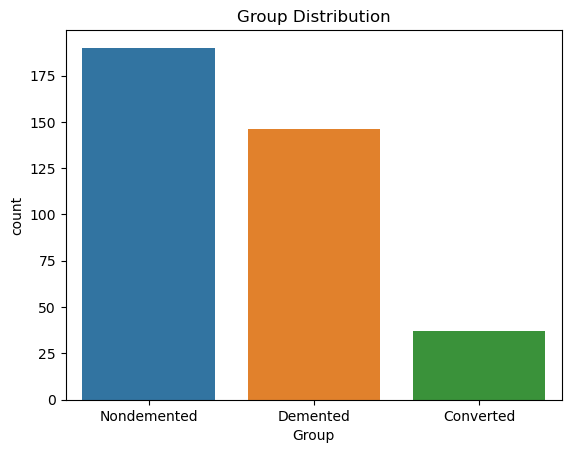

In [5]:
sns.countplot(x=long['Group'])
plt.title('Group Distribution')
plt.show()

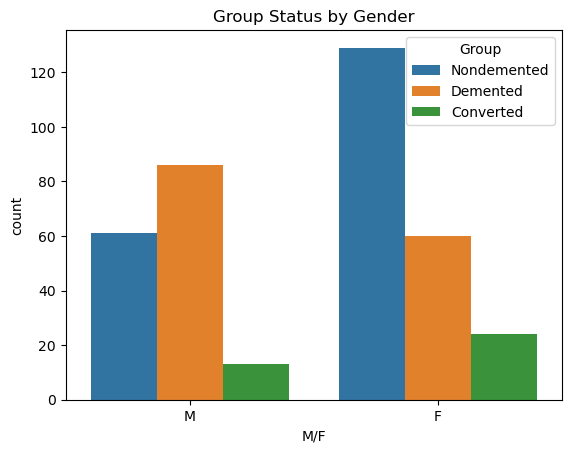

In [68]:
# There are more man than women are in Demented group
sns.countplot(data=long, x=long['M/F'],hue='Group')
plt.title('Group Status by Gender')
plt.show()

<AxesSubplot:>

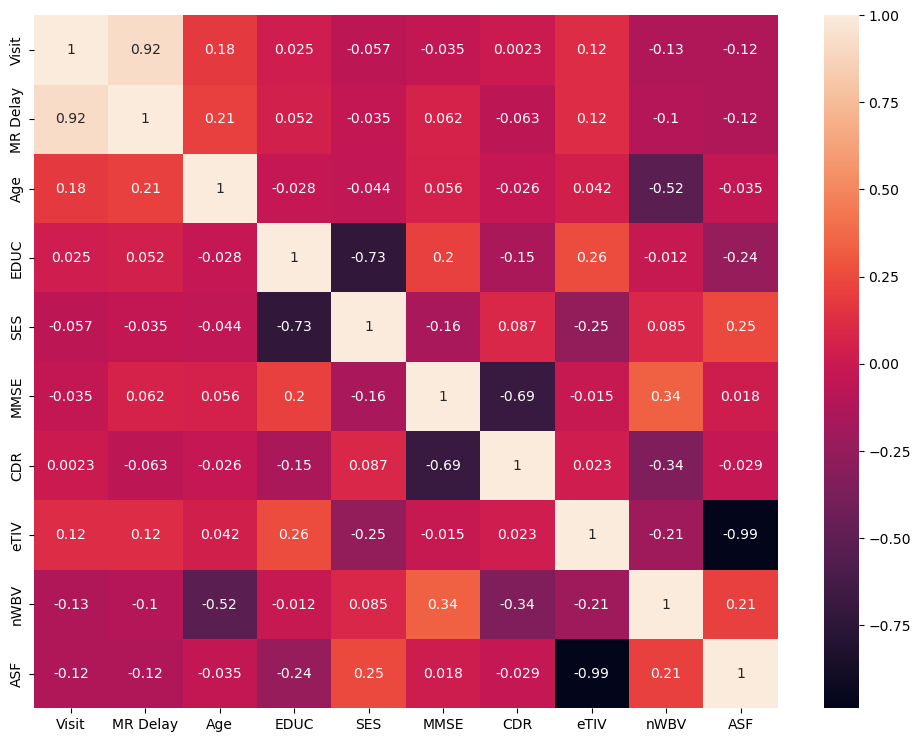

In [71]:
# checking if the features are correlated or not using seaborn heatmap
cor = long.corr(numeric_only=True)
plt.figure(figsize=(12,9))
sns.heatmap(cor, xticklabels=cor.columns.values, yticklabels=cor.columns.values, annot=True)

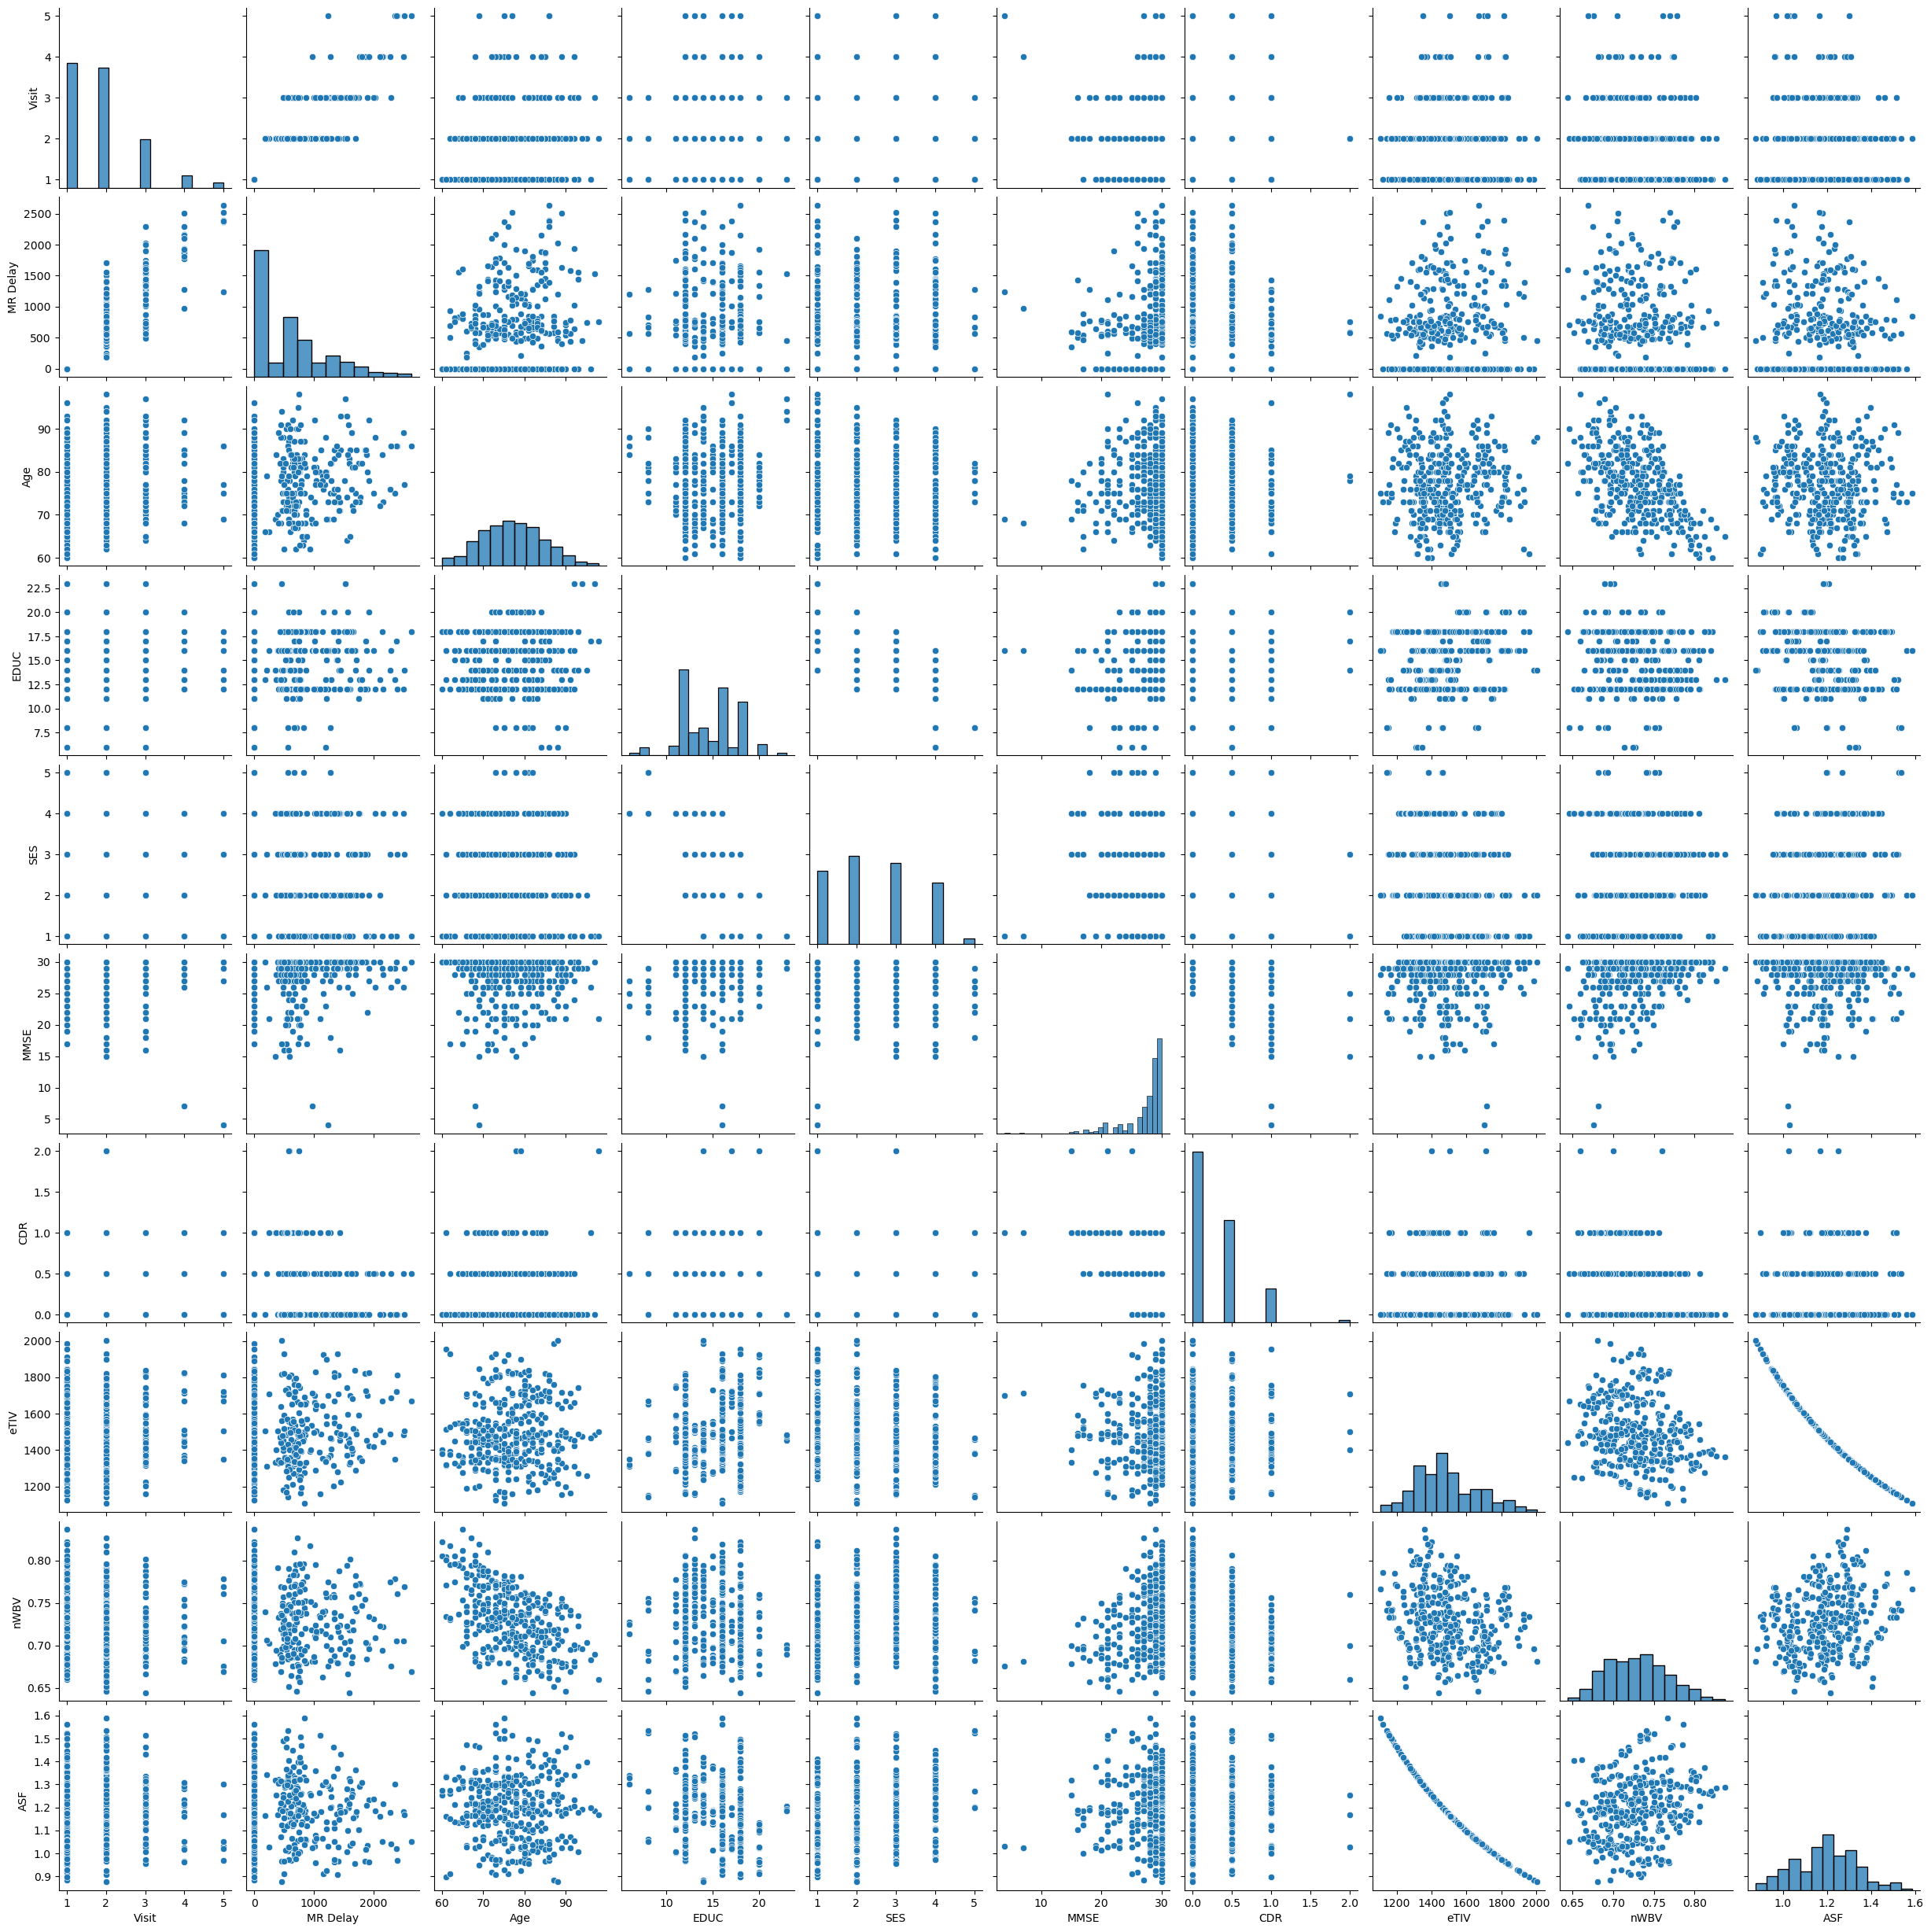

In [72]:
sns.pairplot(long)

Text(0.5, 1.0, 'CDR - Clinical Dementia Rating')

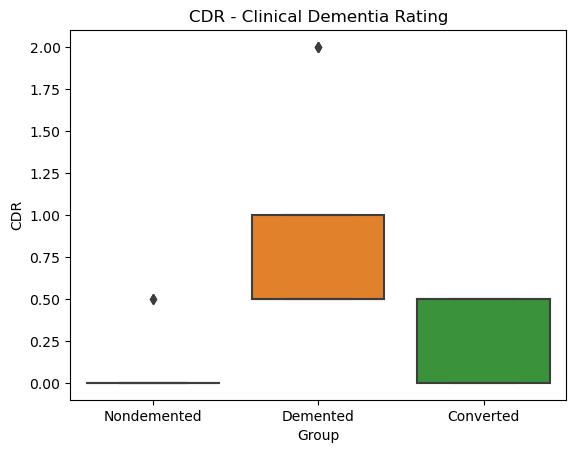

In [74]:
sns.boxplot(x='Group', y='CDR', data=long)
plt.title('CDR - Clinical Dementia Rating')

Text(0.5, 1.0, 'nWBV - Normalize Whole Brain Volume')

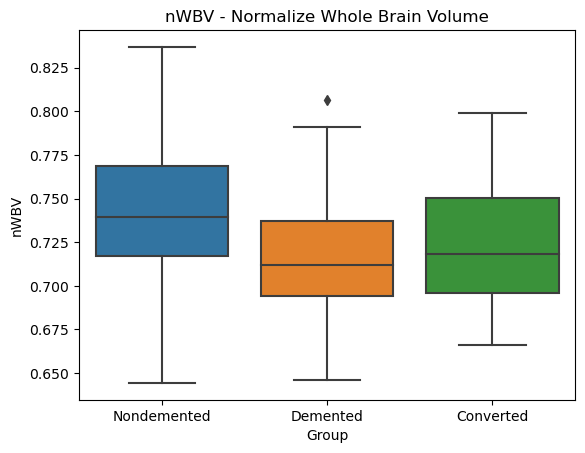

In [75]:
sns.boxplot(x='Group', y='nWBV', data=long)
plt.title('nWBV - Normalize Whole Brain Volume')

### Key findings

- Age: 60-98, mean of 77. Age and nWBV have negative correlation (aging brain shrink).
- EDUC: 6-23, mode of 12, highly corellated with SES (-0.72) --> can be used to imputate NaN of collumn SES
- M/F: gender corrleated with eTIV and ASF
- CDR: can be an important feature for prediction, also has good correlation with MMSE (-0.69)--> can be used for imputation of NaN values
- eTIV and ASF have very strong negative correlation of -0.99

## Data Cleansing

In [15]:
# Replace NaN from SES by median of patient with the same EDUC
long.groupby(['EDUC'])['SES'].median()
long.groupby(['EDUC'])['SES'].transform('median')
long['SES'].fillna(long.groupby('EDUC')['SES'].transform('median'), inplace=True)

In [16]:
# Replace NaN from MMSE by median of patient with the same CDR
long.groupby(['CDR'])['MMSE'].median()
long.groupby(['CDR'])['MMSE'].transform('median')
long['MMSE'].fillna(long.groupby(['CDR'])['MMSE'].transform('median'), inplace=True)

In [17]:
# Check again for NaN values
long.isna().sum()[long.isna().sum()>0]

Series([], dtype: int64)

In [18]:
# One-hot encoding for M/F, Male = 1
long['M/F'] = long['M/F'].replace(['F','M'], [0,1])
long

Subject ID         MRI ID        Group  Visit  MR Delay  M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0    1    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457    1    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0    1    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560    1    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895    1    R   80   
..         ...            ...          ...    ...       ...  ...  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842    1    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297    1    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0    0    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763    0    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608    0    R   65   

     EDUC  SES  MMSE  CDR         eTIV      nWBV       ASF  
0      14  2.0  27.0  0.0  1986.550000  0.696106  0.883440  
1      14  2.0  30.0  0.0  2004.479526  0.681062  0.875539  
2      12  3.0  23.0  0.5  1678.290000  0.736336  1.045710  
3      12  3.0  28.0  0.5  1737.620000  0.713402  1.010000  
4      12  3.0  22.0  0.5  1697.911134  0.701236  1.033623  
..    ...  ...   ...  ...          ...       ...       ...  
368    16  1.0  28.0  0.5  1692.880000  0.693926  1.036690  
369    16  1.0  26.0  0.5  1688.009649  0.675457  1.039686  
370    13  2.0  30.0  0.0  1319.020000  0.801006  1.330540  
371    13  2.0  30.0  0.0  1326.650000  0.795981  1.322890  
372    13  2.0  30.0  0.0  1332.944463  0.801248  1.316634  

[373 rows x 15 columns]

In [19]:
long['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

In [20]:
long.groupby(['Visit','Group'])['Subject ID'].count()

Visit  Group      
1      Converted      14
       Demented       64
       Nondemented    72
2      Converted      12
       Demented       62
       Nondemented    70
3      Converted       8
       Demented       16
       Nondemented    34
4      Converted       2
       Demented        3
       Nondemented    10
5      Converted       1
       Demented        1
       Nondemented     4
Name: Subject ID, dtype: int64

In [21]:
# Save the full cleaned data to csv
long.to_csv('./Data/ad_cleaned_full.csv', index = False)

## Plan for model selection

According to the data descriptions, patients in Converted group were Nondemented at the first visit, and converted into Demented during the next visits but didn't state which one.

Data subset to use:

Plan A:
- Connverted patients (14): keep the first visit only and move to Nondemented group.
- Demented (64) and Nondemented (72): keep all visits.
M/F, SES, EDUC will be the same for each patient, other factors might change. It is reasonable since patients can come to visit doctors at any stage of disease.

Plan B:
- Use only the first visit for analyze and change to Nondemented group.

<b>Fields to drop</b>: Subject ID, MRI ID, Visit, MR Delay, Hand, ASF

## Plan A: 350 records

In [22]:
convert_del = long[(long['Group']== 'Converted') & (long['Visit']!=1)]
print(convert_del.shape)

(23, 15)


In [23]:
ad_350 = long[~long.index.isin(convert_del.index)]
ad_350.shape

(350, 15)

In [24]:
ad_350['Group'] = ad_350['Group'].replace(['Converted'], ['Nondemented'])
#ad_350[ad_350['Group'] == 'Converted']['Group'] = 'Nondemented'
ad_350

C:\Users\lethu\AppData\Local\Temp\ipykernel_1248\3820589190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_350['Group'] = ad_350['Group'].replace(['Converted'], ['Nondemented'])


Subject ID         MRI ID        Group  Visit  MR Delay  M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0    1    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457    1    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0    1    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560    1    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895    1    R   80   
..         ...            ...          ...    ...       ...  ...  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842    1    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297    1    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0    0    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763    0    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608    0    R   65   

     EDUC  SES  MMSE  CDR         eTIV      nWBV       ASF  
0      14  2.0  27.0  0.0  1986.550000  0.696106  0.883440  
1      14  2.0  30.0  0.0  2004.479526  0.681062  0.875539  
2      12  3.0  23.0  0.5  1678.290000  0.736336  1.045710  
3      12  3.0  28.0  0.5  1737.620000  0.713402  1.010000  
4      12  3.0  22.0  0.5  1697.911134  0.701236  1.033623  
..    ...  ...   ...  ...          ...       ...       ...  
368    16  1.0  28.0  0.5  1692.880000  0.693926  1.036690  
369    16  1.0  26.0  0.5  1688.009649  0.675457  1.039686  
370    13  2.0  30.0  0.0  1319.020000  0.801006  1.330540  
371    13  2.0  30.0  0.0  1326.650000  0.795981  1.322890  
372    13  2.0  30.0  0.0  1332.944463  0.801248  1.316634  

[350 rows x 15 columns]

In [25]:
ad_350['Group'].value_counts()

Nondemented    204
Demented       146
Name: Group, dtype: int64

In [26]:
ad_350 = ad_350.drop(columns=['Subject ID','MRI ID', 'Visit', 'MR Delay', 'Hand', 'ASF'])
ad_350

Group  M/F  Age  EDUC  SES  MMSE  CDR         eTIV      nWBV
0    Nondemented    1   87    14  2.0  27.0  0.0  1986.550000  0.696106
1    Nondemented    1   88    14  2.0  30.0  0.0  2004.479526  0.681062
2       Demented    1   75    12  3.0  23.0  0.5  1678.290000  0.736336
3       Demented    1   76    12  3.0  28.0  0.5  1737.620000  0.713402
4       Demented    1   80    12  3.0  22.0  0.5  1697.911134  0.701236
..           ...  ...  ...   ...  ...   ...  ...          ...       ...
368     Demented    1   82    16  1.0  28.0  0.5  1692.880000  0.693926
369     Demented    1   86    16  1.0  26.0  0.5  1688.009649  0.675457
370  Nondemented    0   61    13  2.0  30.0  0.0  1319.020000  0.801006
371  Nondemented    0   63    13  2.0  30.0  0.0  1326.650000  0.795981
372  Nondemented    0   65    13  2.0  30.0  0.0  1332.944463  0.801248

[350 rows x 9 columns]

In [27]:
ad_350.to_csv('./Data/ad_350.csv',index=False)

## Plab B: 150 records

In [28]:
ad_150 = long[long['Visit']==1]
ad_150

Subject ID         MRI ID        Group  Visit  MR Delay  M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0    1    R   87   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0    1    R   75   
5    OAS2_0004  OAS2_0004_MR1  Nondemented      1         0    0    R   88   
7    OAS2_0005  OAS2_0005_MR1  Nondemented      1         0    1    R   80   
10   OAS2_0007  OAS2_0007_MR1     Demented      1         0    1    R   71   
..         ...            ...          ...    ...       ...  ...  ...  ...   
359  OAS2_0182  OAS2_0182_MR1     Demented      1         0    1    R   73   
361  OAS2_0183  OAS2_0183_MR1  Nondemented      1         0    0    R   66   
365  OAS2_0184  OAS2_0184_MR1     Demented      1         0    0    R   72   
367  OAS2_0185  OAS2_0185_MR1     Demented      1         0    1    R   80   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0    0    R   61   

     EDUC  SES  MMSE  CDR     eTIV      nWBV      ASF  
0      14  2.0  27.0  0.0  1986.55  0.696106  0.88344  
2      12  3.0  23.0  0.5  1678.29  0.736336  1.04571  
5      18  3.0  28.0  0.0  1215.33  0.709512  1.44406  
7      12  4.0  28.0  0.0  1688.58  0.711502  1.03933  
10     16  2.0  28.0  0.5  1357.33  0.748085  1.29298  
..    ...  ...   ...  ...      ...       ...      ...  
359    12  3.0  23.0  0.5  1661.27  0.697563  1.05642  
361    13  2.0  30.0  0.0  1495.24  0.746302  1.17373  
365    16  3.0  24.0  0.5  1353.81  0.733098  1.29634  
367    16  1.0  28.0  0.5  1703.59  0.710542  1.03018  
370    13  2.0  30.0  0.0  1319.02  0.801006  1.33054  

[150 rows x 15 columns]

In [29]:
ad_150['Group'] = ad_150['Group'].replace(['Converted'], ['Nondemented'])
#ad_150[ad_150['Group'] == 'Converted']['Group'] = 'Nondemented'
ad_150

C:\Users\lethu\AppData\Local\Temp\ipykernel_1248\284695799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_150['Group'] = ad_150['Group'].replace(['Converted'], ['Nondemented'])


Subject ID         MRI ID        Group  Visit  MR Delay  M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0    1    R   87   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0    1    R   75   
5    OAS2_0004  OAS2_0004_MR1  Nondemented      1         0    0    R   88   
7    OAS2_0005  OAS2_0005_MR1  Nondemented      1         0    1    R   80   
10   OAS2_0007  OAS2_0007_MR1     Demented      1         0    1    R   71   
..         ...            ...          ...    ...       ...  ...  ...  ...   
359  OAS2_0182  OAS2_0182_MR1     Demented      1         0    1    R   73   
361  OAS2_0183  OAS2_0183_MR1  Nondemented      1         0    0    R   66   
365  OAS2_0184  OAS2_0184_MR1     Demented      1         0    0    R   72   
367  OAS2_0185  OAS2_0185_MR1     Demented      1         0    1    R   80   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0    0    R   61   

     EDUC  SES  MMSE  CDR     eTIV      nWBV      ASF  
0      14  2.0  27.0  0.0  1986.55  0.696106  0.88344  
2      12  3.0  23.0  0.5  1678.29  0.736336  1.04571  
5      18  3.0  28.0  0.0  1215.33  0.709512  1.44406  
7      12  4.0  28.0  0.0  1688.58  0.711502  1.03933  
10     16  2.0  28.0  0.5  1357.33  0.748085  1.29298  
..    ...  ...   ...  ...      ...       ...      ...  
359    12  3.0  23.0  0.5  1661.27  0.697563  1.05642  
361    13  2.0  30.0  0.0  1495.24  0.746302  1.17373  
365    16  3.0  24.0  0.5  1353.81  0.733098  1.29634  
367    16  1.0  28.0  0.5  1703.59  0.710542  1.03018  
370    13  2.0  30.0  0.0  1319.02  0.801006  1.33054  

[150 rows x 15 columns]

In [30]:
ad_150['Group'].value_counts()

Nondemented    86
Demented       64
Name: Group, dtype: int64

In [31]:
ad_150 = ad_150.drop(columns=['Subject ID','MRI ID', 'Visit', 'MR Delay', 'Hand','ASF'])
ad_150

Group  M/F  Age  EDUC  SES  MMSE  CDR     eTIV      nWBV
0    Nondemented    1   87    14  2.0  27.0  0.0  1986.55  0.696106
2       Demented    1   75    12  3.0  23.0  0.5  1678.29  0.736336
5    Nondemented    0   88    18  3.0  28.0  0.0  1215.33  0.709512
7    Nondemented    1   80    12  4.0  28.0  0.0  1688.58  0.711502
10      Demented    1   71    16  2.0  28.0  0.5  1357.33  0.748085
..           ...  ...  ...   ...  ...   ...  ...      ...       ...
359     Demented    1   73    12  3.0  23.0  0.5  1661.27  0.697563
361  Nondemented    0   66    13  2.0  30.0  0.0  1495.24  0.746302
365     Demented    0   72    16  3.0  24.0  0.5  1353.81  0.733098
367     Demented    1   80    16  1.0  28.0  0.5  1703.59  0.710542
370  Nondemented    0   61    13  2.0  30.0  0.0  1319.02  0.801006

[150 rows x 9 columns]

In [32]:
ad_150.to_csv('./Data/ad_150.csv',index=False)

This csv files will be used for model selection in the next step.